In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip3 install torch torchvision torchaudio

In [4]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb

--2023-12-05 00:38:18--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4332 (4.2K) [application/x-deb]
Saving to: ‘cuda-keyring_1.1-1_all.deb’

cuda-keyring_1.1-1_ 100%[===================>]   4.23K  --.-KB/s    in 0s      

2023-12-05 00:38:18 (194 MB/s) - ‘cuda-keyring_1.1-1_all.deb’ saved [4332/4332]



In [5]:
!sudo dpkg -i cuda-keyring_1.1-1_all.deb

(Reading database ... 114840 files and directories currently installed.)
Preparing to unpack cuda-keyring_1.1-1_all.deb ...
Unpacking cuda-keyring (1.1-1) over (1.1-1) ...
Setting up cuda-keyring (1.1-1) ...


In [6]:
!sudo apt-get update

Get:1 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Get:2 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Hit:3 http://packages.cloud.google.com/apt gcsfuse-focal InRelease             
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]      
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Get:7 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [553 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]        
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [632 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1030 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packa

In [7]:
!sudo apt-get -y install cuda-toolkit-12-3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-toolkit-12-2-config-common libcublas-12-2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  cuda-cccl-12-3 cuda-command-line-tools-12-3 cuda-compiler-12-3 cuda-crt-12-3
  cuda-cudart-12-3 cuda-cudart-dev-12-3 cuda-cuobjdump-12-3 cuda-cupti-12-3
  cuda-cupti-dev-12-3 cuda-cuxxfilt-12-3 cuda-documentation-12-3
  cuda-driver-dev-12-3 cuda-gdb-12-3 cuda-libraries-12-3
  cuda-libraries-dev-12-3 cuda-nsight-12-3 cuda-nsight-compute-12-3
  cuda-nsight-systems-12-3 cuda-nvcc-12-3 cuda-nvdisasm-12-3
  cuda-nvml-dev-12-3 cuda-nvprof-12-3 cuda-nvprune-12-3 cuda-nvrtc-12-3
  cuda-nvrtc-dev-12-3 cuda-nvtx-12-3 cuda-nvvm-12-3 cuda-nvvp-12-3
  cuda-opencl-12-3 cuda-opencl-dev-12-3 cuda-profiler-api-12-3
  cuda-sanitizer-12-3 cuda-toolkit-12-3-config-common cuda-tools-12-3
 

In [8]:
import torch
torch.cuda.is_available()

True

In [9]:
#build with MONAI C++/CUDA extensions:
!BUILD_MONAI=1 pip install --no-build-isolation git+https://github.com/Project-MONAI/MONAI#egg=monai

  Cloning https://github.com/Project-MONAI/MONAI to /tmp/pip-install-5h270afv/monai_5e78e830940f4de19cf7eabf7d761a9d
  Running command git clone --filter=blob:none --quiet https://github.com/Project-MONAI/MONAI /tmp/pip-install-5h270afv/monai_5e78e830940f4de19cf7eabf7d761a9d
  Resolved https://github.com/Project-MONAI/MONAI to commit 2fc012687f428c7dacbc14e5d57e92d5d5f49013
  Preparing metadata (pyproject.toml) ... done
  Created wheel for monai: filename=monai-1.3.0+40.g2fc01268-cp310-cp310-linux_x86_64.whl size=10340635 sha256=26a7bacba8c6fab4d7358ab4d3c58c46f58623dc1c09067ee741d2b98c465797
  Stored in directory: /tmp/pip-ephem-wheel-cache-rxi2r1fo/wheels/ae/df/85/e1529c65c7b6d24f94fb29018f2e6a19809d416ee64044d71f
Successfully built monai


In [10]:
#Validating the install
!python -c "import monai; monai.config.print_config()"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
MONAI version: 1.3.0+40.g2fc01268
Numpy version: 1.24.3
Pytorch version: 2.0.0
MONAI flags: HAS_EXT = True, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 2fc012687f428c7dacbc14e5d57e92d5d5f49013
MONAI __file__: /opt/conda/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.13
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.21.0
scipy version: 1.7.3
Pillow version: 9.5.0
Tensorboard version: 2.13.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.15.1
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.3
pandas version: 2.1.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
tran

In [11]:
#install MONAI Generative Models
!git clone https://github.com/Project-MONAI/GenerativeModels.git

Cloning into 'GenerativeModels'...
remote: Enumerating objects: 3660, done.
remote: Counting objects: 100% (1157/1157), done.
remote: Compressing objects: 100% (529/529), done.
remote: Total 3660 (delta 824), reused 830 (delta 624), pack-reused 2503
Receiving objects: 100% (3660/3660), 21.30 MiB | 33.36 MiB/s, done.
Resolving deltas: 100% (2171/2171), done.


In [12]:
!wget https://github.com/Project-MONAI/MONAI/blob/dev/setup.py

--2023-12-05 00:50:50--  https://github.com/Project-MONAI/MONAI/blob/dev/setup.py
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34376 (34K) [text/plain]
Saving to: ‘setup.py’

setup.py            100%[===================>]  33.57K  --.-KB/s    in 0.005s  

2023-12-05 00:50:50 (7.12 MB/s) - ‘setup.py’ saved [34376/34376]



In [13]:
!cd GenerativeModels/
!python setup.py install

Traceback (most recent call last):
  File "/kaggle/working/setup.py", line 1, in <module>
    {"payload":{"allShortcutsEnabled":false,"fileTree":{"":{"items":[{"name":".github","path":".github","contentType":"directory"},{"name":"docs","path":"docs","contentType":"directory"},{"name":"monai","path":"monai","contentType":"directory"},{"name":"tests","path":"tests","contentType":"directory"},{"name":".clang-format","path":".clang-format","contentType":"file"},{"name":".deepsource.toml","path":".deepsource.toml","contentType":"file"},{"name":".dockerignore","path":".dockerignore","contentType":"file"},{"name":".gitattributes","path":".gitattributes","contentType":"file"},{"name":".gitignore","path":".gitignore","contentType":"file"},{"name":".pre-commit-config.yaml","path":".pre-commit-config.yaml","contentType":"file"},{"name":".readthedocs.yml","path":".readthedocs.yml","contentType":"file"},{"name":"CHANGELOG.md","path":"CHANGELOG.md","contentType":"file"},{"name":"CITATION.cff","path"

In [14]:
!pip install lpips
!pip install monai-generative==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.9 MB/s eta 0:00:00
  Obtaining dependency information for monai-generative==0.2.2 from https://files.pythonhosted.org/packages/be/7d/eb5b5f9813646f3864f93c61b29550f3a14b06383b79f2f327cc71540cae/monai_generative-0.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 4.4 MB/s eta 0:00:00


In [15]:
#Setup environment
!python -c "import monai" || pip install -q "monai-weekly[tqdm]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
#Setup imports
import os
import shutil
import tempfile
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from monai import transforms
from monai.apps import MedNISTDataset
from monai.config import print_config
from monai.data import CacheDataset, DataLoader
from monai.utils import first, set_determinism
from torch.cuda.amp import GradScaler, autocast
from tqdm import tqdm

from generative.inferers import DiffusionInferer
from generative.networks.nets import DiffusionModelUNet
from generative.networks.schedulers import DDPMScheduler

print_config()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


MONAI version: 1.3.0+40.g2fc01268
Numpy version: 1.24.3
Pytorch version: 2.0.0
MONAI flags: HAS_EXT = True, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 2fc012687f428c7dacbc14e5d57e92d5d5f49013
MONAI __file__: /opt/conda/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.13
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.21.0
scipy version: 1.7.3
Pillow version: 9.5.0
Tensorboard version: 2.13.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.15.1
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.3
pandas version: 2.1.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: 4.35.0
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
   

In [17]:
#Setup data directory
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
print(root_dir)

/tmp/tmpe9ae_3y6


In [18]:
#Set deterministic training for reproducibility
set_determinism(42)

In [19]:
#Setup MedNIST Dataset and training and validation dataloaders
train_data = MedNISTDataset(root_dir=root_dir, section="training", download=True, progress=False, seed=0)
train_datalist = [{"image": item["image"]} for item in train_data.data if item["class_name"] == "Hand"]

2023-12-05 00:52:13,963 - INFO - Downloaded: /tmp/tmpe9ae_3y6/MedNIST.tar.gz
2023-12-05 00:52:14,073 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-12-05 00:52:14,074 - INFO - Writing into directory: /tmp/tmpe9ae_3y6.


In [20]:
#!export 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:2056'

In [21]:
#torch.cuda.set_per_process_memory_fraction(0.8, 0)

In [22]:
train_transforms = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.EnsureChannelFirstd(keys=["image"]),
        transforms.ScaleIntensityRanged(keys=["image"], a_min=0.0, a_max=255.0, b_min=0.0, b_max=1.0, clip=True),
        transforms.RandAffined(
            keys=["image"],
            rotate_range=[(-np.pi / 36, np.pi / 36), (-np.pi / 36, np.pi / 36)],
            translate_range=[(-1, 1), (-1, 1)],
            scale_range=[(-0.05, 0.05), (-0.05, 0.05)],
            spatial_size=[64, 64],
            padding_mode="zeros",
            prob=0.5,
        ),
    ]
)
train_ds = CacheDataset(data=train_datalist, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=4, persistent_workers=True)

Loading dataset: 100%|██████████| 7999/7999 [00:09<00:00, 805.68it/s]


In [23]:
val_data = MedNISTDataset(root_dir=root_dir, section="validation", download=True, progress=False, seed=0)
val_datalist = [{"image": item["image"]} for item in val_data.data if item["class_name"] == "Hand"]
val_transforms = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.EnsureChannelFirstd(keys=["image"]),
        transforms.ScaleIntensityRanged(keys=["image"], a_min=0.0, a_max=255.0, b_min=0.0, b_max=1.0, clip=True),
    ]
)
val_ds = CacheDataset(data=val_datalist, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=128, shuffle=False, num_workers=4, persistent_workers=True)

2023-12-05 00:53:18,021 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-12-05 00:53:18,023 - INFO - File exists: /tmp/tmpe9ae_3y6/MedNIST.tar.gz, skipped downloading.
2023-12-05 00:53:18,024 - INFO - Non-empty folder exists in /tmp/tmpe9ae_3y6/MedNIST, skipped extracting.


Loading dataset: 100%|██████████| 1005/1005 [00:01<00:00, 780.65it/s]


batch shape: torch.Size([32, 1, 64, 64])


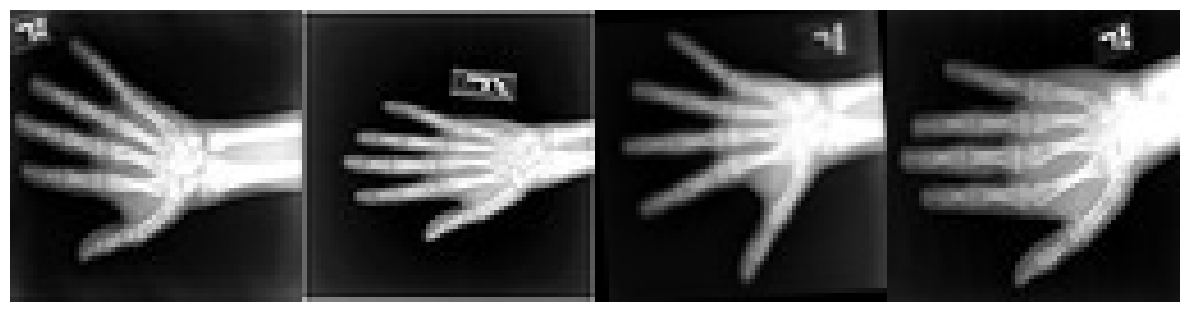

In [24]:
#Visualisation of the training images
check_data = first(train_loader)
print(f"batch shape: {check_data['image'].shape}")
image_visualisation = torch.cat(
    [check_data["image"][0, 0], check_data["image"][1, 0], check_data["image"][2, 0], check_data["image"][3, 0]], dim=1
)
plt.figure("training images", (12, 6))
plt.imshow(image_visualisation, vmin=0, vmax=1, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

In [25]:
#Define network, scheduler, optimizer, and inferer
device = torch.device("cuda")

model = DiffusionModelUNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    num_channels=(128, 256, 256),
    attention_levels=(False, True, True),
    num_res_blocks=1,
    num_head_channels=256,
)
model.to(device)

scheduler = DDPMScheduler(num_train_timesteps=1000)

optimizer = torch.optim.Adam(params=model.parameters(), lr=2.5e-5)

inferer = DiffusionInferer(scheduler)

100%|██████████| 1000/1000 [00:13<00:00, 72.40it/s]


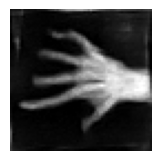

100%|██████████| 1000/1000 [00:13<00:00, 72.98it/s]


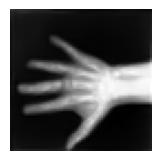

100%|██████████| 1000/1000 [00:13<00:00, 73.23it/s]


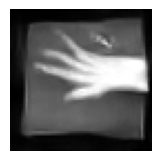

100%|██████████| 1000/1000 [00:13<00:00, 73.58it/s]


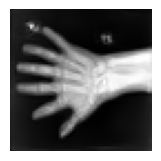

100%|██████████| 1000/1000 [00:13<00:00, 74.14it/s]


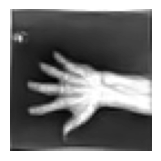

100%|██████████| 1000/1000 [00:13<00:00, 74.03it/s]


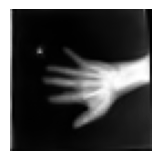

100%|██████████| 1000/1000 [00:13<00:00, 73.94it/s]


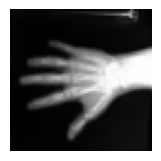

100%|██████████| 1000/1000 [00:13<00:00, 74.40it/s]


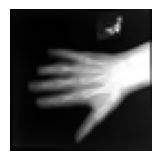

100%|██████████| 1000/1000 [00:13<00:00, 75.61it/s]


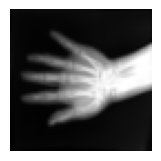

100%|██████████| 1000/1000 [00:13<00:00, 75.01it/s]


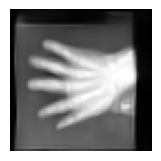

train completed, total time: 4783.148205280304.


In [26]:
#Model training
use_pretrained = False

if use_pretrained:
    model = torch.hub.load("marksgraham/pretrained_generative_models:v0.2", model="ddpm_2d", verbose=True).to(device)
else:
    n_epochs = 50
    val_interval = 5
    epoch_loss_list = []
    val_epoch_loss_list = []

    scaler = GradScaler()
    total_start = time.time()
    for epoch in range(n_epochs):
        model.train()
        epoch_loss = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), ncols=70)
        progress_bar.set_description(f"Epoch {epoch}")
        for step, batch in progress_bar:
            images = batch["image"].to(device)
            optimizer.zero_grad(set_to_none=True)

            with autocast(enabled=True):
                # Generate random noise
                noise = torch.randn_like(images).to(device)

                # Create timesteps
                timesteps = torch.randint(
                    0, inferer.scheduler.num_train_timesteps, (images.shape[0],), device=images.device
                ).long()

                # Get model prediction
                noise_pred = inferer(inputs=images, diffusion_model=model, noise=noise, timesteps=timesteps)

                loss = F.mse_loss(noise_pred.float(), noise.float())

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            epoch_loss += loss.item()

            progress_bar.set_postfix({"loss": epoch_loss / (step + 1)})
        epoch_loss_list.append(epoch_loss / (step + 1))

        if (epoch + 1) % val_interval == 0:
            model.eval()
            val_epoch_loss = 0
            for step, batch in enumerate(val_loader):
                images = batch["image"].to(device)
                with torch.no_grad():
                    with autocast(enabled=True):
                        noise = torch.randn_like(images).to(device)
                        timesteps = torch.randint(
                            0, inferer.scheduler.num_train_timesteps, (images.shape[0],), device=images.device
                        ).long()
                        noise_pred = inferer(inputs=images, diffusion_model=model, noise=noise, timesteps=timesteps)
                        val_loss = F.mse_loss(noise_pred.float(), noise.float())

                val_epoch_loss += val_loss.item()
                progress_bar.set_postfix({"val_loss": val_epoch_loss / (step + 1)})
            val_epoch_loss_list.append(val_epoch_loss / (step + 1))

            # Sampling image during training
            noise = torch.randn((1, 1, 64, 64))
            noise = noise.to(device)
            scheduler.set_timesteps(num_inference_steps=1000)
            with autocast(enabled=True):
                image = inferer.sample(input_noise=noise, diffusion_model=model, scheduler=scheduler)

            plt.figure(figsize=(2, 2))
            plt.imshow(image[0, 0].cpu(), vmin=0, vmax=1, cmap="gray")
            plt.tight_layout()
            plt.axis("off")
            plt.show()

    total_time = time.time() - total_start
    print(f"train completed, total time: {total_time}.")

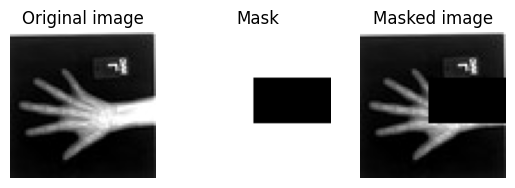

In [27]:
#Get masked image for inpainting
image_idx = 1

val_batch = first(val_loader)["image"]
val_image = val_batch[image_idx, None, ...]

mask = torch.ones_like(val_image)
mask[:, :, 20:40, 30:80] = 0
val_image_masked = val_image * mask

# plot
plt.subplot(1, 3, 1)
plt.imshow(val_image[0, 0, ...], cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(mask[0, 0, ...], cmap="gray")
plt.axis("off")
plt.title("Mask")
plt.subplot(1, 3, 3)
plt.imshow(val_image_masked[0, 0, ...], cmap="gray")
plt.axis("off")
plt.title("Masked image")
plt.show()

100%|██████████| 1000/1000 [01:55<00:00,  8.62it/s]


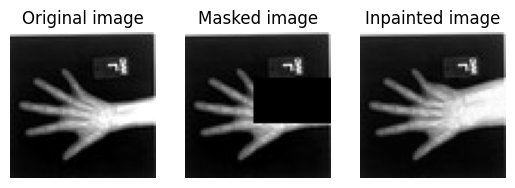

In [28]:
#Inpaint
model.eval()
mask = mask.to(device)
val_image_masked = val_image_masked.to(device)
timesteps = torch.Tensor((999,)).to(noise.device).long()
val_image_inpainted = torch.randn((1, 1, 64, 64)).to(device)

scheduler.set_timesteps(num_inference_steps=1000)
progress_bar = tqdm(scheduler.timesteps)

num_resample_steps = 4
with torch.no_grad():
    with autocast(enabled=True):
        for t in progress_bar:
            for u in range(num_resample_steps):
                # get the known portion at t-1
                if t > 0:
                    noise = torch.randn((1, 1, 64, 64)).to(device)
                    timesteps_prev = torch.Tensor((t - 1,)).to(noise.device).long()
                    val_image_inpainted_prev_known = scheduler.add_noise(
                        original_samples=val_image_masked, noise=noise, timesteps=timesteps_prev
                    )
                else:
                    val_image_inpainted_prev_known = val_image_masked

                # perform a denoising step to get the unknown portion at t-1
                if t > 0:
                    timesteps = torch.Tensor((t,)).to(noise.device).long()
                    model_output = model(val_image_inpainted, timesteps=timesteps)
                    val_image_inpainted_prev_unknown, _ = scheduler.step(model_output, t, val_image_inpainted)

                # combine known and unknown using the mask
                val_image_inpainted = torch.where(
                    mask == 1, val_image_inpainted_prev_known, val_image_inpainted_prev_unknown
                )

                # perform resampling
                if t > 0 and u < (num_resample_steps - 1):
                    # sample x_t from x_t-1
                    noise = torch.randn((1, 1, 64, 64)).to(device)
                    val_image_inpainted = (
                        torch.sqrt(1 - scheduler.betas[t - 1]) * val_image_inpainted
                        + torch.sqrt(scheduler.betas[t - 1]) * noise
                    )


# plot
plt.subplot(1, 3, 1)
plt.imshow(val_image[0, 0, ...].cpu(), cmap="gray")
plt.title("Original image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(val_image_masked[0, 0, ...].cpu(), cmap="gray")
plt.axis("off")
plt.title("Masked image")
plt.subplot(1, 3, 3)
plt.imshow(val_image_inpainted[0, 0, ...].cpu(), cmap="gray")
plt.axis("off")
plt.title("Inpainted image")
plt.show()

In [29]:
#Cleanup data directory
if directory is None:
    shutil.rmtree(root_dir)